In [1]:
# 넘파이로 간단하게 구햔한 과정이 실제 케라스의 SimpleRNN에 해당한다.
from keras.layers import SimpleRNN

> SimpleRNN이 한가지 다른점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리한다는 점이다. 즉 (timesteps, input_features) 크기가 아니라 (batch_size, timesteps, input_features)크기의 입력을 받는다.
> #### 케라스에 있는 모든 순환 층과 마찬가지로 SimpleRNN은 두가지 모드로 실행할 수 있다. 각 타임스탭의 출력을 모은 전체 시퀀스를 반환하거나, 입력시퀀스에 대한 마지막 출력만 반환할 수 있다.

### 마지막 타임스텝의 출력만 얻는 예제

In [2]:
from keras.models import Sequential
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


#### 전체 시퀀스를 반환하려면 SimpleRNN의 인자에 return_sequence값을 true로 해주면 된다.

## IMDB 영화 리뷰 분류 문제에 적용해 보기

### IMDB데이터 전처리

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 500 # 사용할 텍스트의 길이(가장 빈번한 10000개의 단어만 사용)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples X time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_data의 크기:', input_train.shape)
print('input_test의 크기:', input_test.shape)

데이터 로딩...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples X time)
input_data의 크기: (25000, 500)
input_test의 크기: (25000, 500)


### Embedding 층과 SimpleRNN층을 사용하여 간단한 순환 네트워크 훈련시키기

In [4]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 108ms/step - loss: 0.6767 - acc: 0.5532 - val_loss: 0.4893 - val_acc: 0.7628
Epoch 2/10
157/157 [==============================] - 16s 104ms/step - loss: 0.4348 - acc: 0.8081 - val_loss: 0.3764 - val_acc: 0.8428
Epoch 3/10
157/157 [==============================] - 16s 104ms/step - loss: 0.3058 - acc: 0.8779 - val_loss: 0.3959 - val_acc: 0.8226
Epoch 4/10
157/157 [==============================] - 16s 105ms/step - loss: 0.2242 - acc: 0.9125 - val_loss: 0.3818 - val_acc: 0.8394
Epoch 5/10
157/157 [==============================] - 17s 106ms/step - loss: 0.1726 - acc: 0.9373 - val_loss: 0.5396 - val_acc: 0.7782
Epoch 6/10
157/157 [==============================] - 16s 105ms/step - loss: 0.1139 - acc: 0.9615 - val_loss: 0.4340 - val_acc: 0.8444
Epoch 7/10
157/157 [==============================] - 16s 104ms/step - loss: 0.0693 - acc: 0.9792 - val_loss: 0.6258 - val_acc: 0.7812
Epoch 8/10
157/157 [==============================] - 1

### 결과 그래프 그리기

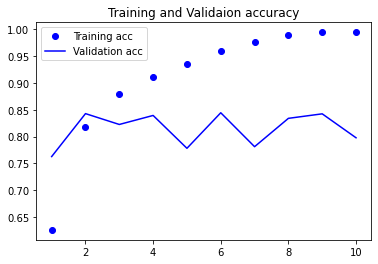

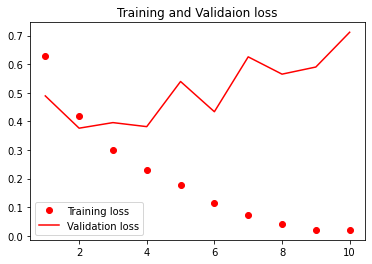

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validaion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validaion loss')
plt.legend()

plt.show()

> 이 모델이 성능이 높지 않은 이유는 500개의 단어만 사용했기 때문이여..